# Qiskit
Im folgenden Kapitel werden wir uns die Grundlagen des Framework Qiskit anschauen und erlernen, wie wir mit der Hilfe von Qiskit einen Quantencomputer steuern können. Wichtig zu erwähnen ist, dass je nach Wissensstand die Grundlagen der Programmiersprache Python einem hier durchaus helfen können.

Quellen:
- [QIS1]: Qiskit.org. 2021. Atoms Computation. [online] Available at: https://qiskit.org/textbook/ch-states/atoms-computation.html [Accessed 1 March 2021].
- [QIS2]: Qiskit.org. 2021. Representing Qubit States. [online] Available at: https://qiskit.org/textbook/ch-states/representing-qubit-states.html [Accessed 1 March 2021].
- [QIS3]: Qiskit.org. 2021. Single Qubit Gates. [online] Available at: https://qiskit.org/textbook/ch-states/single-qubit-gates.html [Accessed 1 March 2021].


## Grundlagen mit Qiskit
Im Folgenden werden wir uns mit den Grundlagen in Qiskit beschäftigen und sehen uns an, wie wir diese anwenden. Um die Grundlagen nachvollziehen zu können, sollte bekannt sein, wie sich binäre Zahlen verhalten. Wie bei klassischen Computern können wir bei den Quantencomputern das Wissen einsetzen, welches wir bereits aus der Digitaltechnik kennen. Mithilfe der binären Schreibweise können wir jegliche Art von Information repräsentieren (QIS1). Bedeutet mithilfe der Qubits können wir binäre Folgen darstellen und somit das Verhalten klassischer Computer "kopieren". Prinzipiell kann man also sagen, dass wir hier auf bereits bekanntes Terrain treffen, jedoch lediglich mit neuen bzw. noch unbekannten Konventionen, die uns bis jetzt noch fremd sind.

Zunächst einmal erstellen wir uns wieder einen Quantum-Circuit welcher wieder unsere Basis darstellt. Diesmal mit 8 Qubits.

In [12]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Laden des IBM Q Account, wenn das Quantum Lab genutzt wird
provider = IBMQ.load_account()


ibmqfactory.load_account:WARNING:2021-03-16 16:07:47,310: Credentials are already in use. The existing account in the session will be replaced.


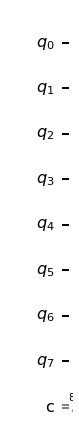

In [34]:
n = 8
number_of_qubits = n
number_of_outputs = n
qc = QuantumCircuit(number_of_qubits, number_of_outputs)
#circuit visualisieren
qc.draw()

In unserem Code haben wir nun zwei wichtige Aspekte. Zum einen definieren wir einen Circuit mit 8 Qubits, die wir jeweils auf 8 unterschiedlichen Lanes sehen. Zusätzlich haben wir in der Variable "number_of_outputs" die Anzahl unserer Output-Bits definiert. Die Anzahl der Outputs gibt dabei an, wie viele Outputs wir in unserem Circuit messen wollen. Möchten wir einen Output aus unserem Circuit erhalten, müssen wir ähnlich wie es bei den klassischen Computern ist, diesen Wert "zurückgeben". Das "zurückgeben" der Output Werte erreichen wir, indem wir einen bestimmten Qubit und somit seinen Zustand messen und das Resultat der Messung einen Output zuweisen.

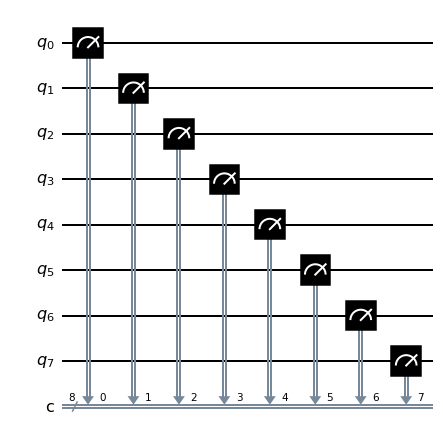

In [35]:
for index in range(n):
    qc.measure(index, index)
qc.draw()

Mithilfe unserer FOR-Schleife haben wir nun erreicht, dass wir die Funktion "measure()" von unserem Quantum-Circuit aufgerufen haben. Die Methode erwartet zwei Parameter. Der erste Parameter gibt den Index des zu messenden Qubits an. Möchten wir also den Ersten Qubit unseres Circuits messen, übergeben wir der Methode eine 0, beim zweiten eine 1 und beim dritten eine 2. Der zweite Parameter gibt an, auf welchen Output das Resultat der Messung geschrieben werden soll (QIS1). Auch hier wird der Index angegeben und startet bei 0.

Als Nächstes werden wir unseren Circuit ausführen, um zu lernen, wie der Workflow ist, eine Quantencomputer Anwendung auszuführen. Zunächst führen wir unseren Code in einem lokalen Simulator aus, bei dem ein klassischer Computer einen Quantencomputer und somit sein Verhalten simuliert und dann führen wir den Circuit auf einen existierenden Quantencomputer von IBM aus.

Result(backend_name='qasm_simulator', backend_version='0.7.6', qobj_id='00301f0e-44a3-41d0-8cc5-56ba08e8d23d', job_id='c770546a-8d80-4c8e-9f6c-fd1e2ce4241e', success=True, results=[ExperimentResult(shots=2000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 2000}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3], ['c', 4], ['c', 5], ['c', 6], ['c', 7]], creg_sizes=[['c', 8]], global_phase=0.0, memory_slots=8, n_qubits=8, name='circuit9', qreg_sizes=[['q', 8]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7]]), status=DONE, seed_simulator=821273787, time_taken=0.008822294000000001, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-03-16T16:15:51.534734, status=COMPLETED, metadata={'max_memory_mb': 32162, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.008

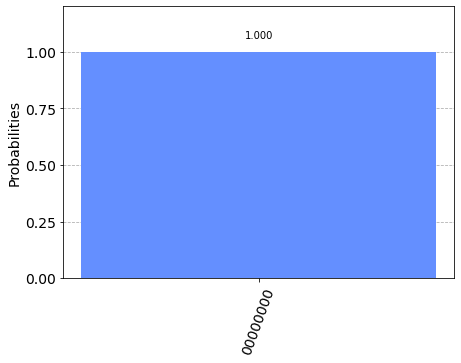

In [17]:
quantum_simulator = Aer.get_backend('qasm_simulator')
assembled_object = assemble(qc, shots=2000)
result = quantum_simulator.run(assembled_object).result()
print(str(result) + '\n')
#Dictionary vorbereiten
counts = result.get_counts()
print(counts)
#Visualisierung der ergebnisse
plot_histogram(counts)

Jetzt gehen wir Schritt für Schritt durch den Code. Zunächst haben wir in der ersten Zeile ein "Backend" gewählt, wo unser Quantum-Circuit ausgeführt werden soll. Als Backend bezeichnen wir dabei das Quantencomputer System, welches genutzt werden soll. In diesem Fall nutzen wir den Standardsimulator, der im Qiskit Framework enthalten ist, und geben den mit 'qasm_simulator' an. Das Qiskit Framework liefert standardmäßig auch noch die Simulationsmöglichkeiten eines "Statevector-Simulators" und des "Unitary-Simulators". Der Hauptunterschied der Simulatoren liegt dabei, wie ein Quantum-Circuit ausgeführt wird und nimmt beispielsweise weitere Matrixmultiplikationen an einem Gate vor, wenn dieses an einem Qubit angewendet werden soll. Mehr zu den einzelnen Standardsimulatoren können Sie in der offiziellen Dokumentation von Qiskit nachlesen:
- https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

Im nächsten Schritt nutzen wir die "assemble"-Funktion, um ein ausführbares Objekt zu erzeugen, welches dann von unserem Simulator ausgeführt werden kann. Auch hier können wir weitere Parameter angeben. Der wichtigste Parameter ist jedoch die Angabe unseres Circuits der ausgeführt werden soll. Optional können wir die Anzahl der "shots" angeben. Die Anzahl der shots gibt an, wie oft die Messung am Circuit durchgeführt werden soll. Standardmäßig liegt die Anzahl bei 1024, in unserem Code erhöhen wir den auf 2000 ausschließlich aus Demozwecken. Der Grund, wieso die Messungen öfters durchgeführt werden, ist, dass durch den Zerfall der Superpositionen der Qubits erhalten wir je nach Ausführung möglicherweise unterschiedliche Zustände. Die Resultate der Zerfälle in die Endzustände werden von Qiskit gezählt und unser gewählter Simulator der "qasm_simulator" gibt uns ein Result-Objekt, wo wir mithilfe der Funktion "get_counts()" ein Dictionary bekommen, welches alle auftretenden Zustände erhält und die absolute Anzahl, wie oft ein Zustand jeweils eingetroffen ist. Das Dictionary geben wir mithilfe der üblichen "print" Funktion von Python aus, um uns das Objekt ansehen zu können. Mithilfe eines Histogramms können wir schließlich das Objekt uns auch visualisieren. 

Dadurch, dass wir bisher keine Zustände an unseren Qubits manipuliert haben, erhalten wir das Ergebnis, dass immer der Zustand '00000000' aufgetreten ist. Als Nächstes führen wir das Ganze auf einem Quantencomputer von IBM aus. Dafür wird aktuell (Stand 2021) ein IBM Quantum Account benötigt.

In [21]:
import qiskit.providers.ibmq.jupyter
IBMQ.load_account()

provider = IBMQ.get_provider(group='open', project='main')
quantum_system = provider.get_backend('ibmq_16_melbourne')
quantum_system

ibmqfactory.load_account:WARNING:2021-03-16 17:03:57,503: Credentials are already in use. The existing account in the session will be replaced.


Card(children=[Toolbar(children=[ToolbarTitle(children=['ibmq_16_melbourne @ (ibm-q/open/main)'], style_='colo…

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

Zunächst einmal laden wir ein Quantensystem, welches unseren Anforderungen entspricht. Da wir 8 Qubits nutzen, benötigen wir ein System, welches die Anzahl unserer Qubits auch unterstützt. Die aktuellen verfügbaren Systeme müssen entsprechend aus dem Quantum Lab entnommen werden, da die Verfügbarkeit entsprechend variieren kann. In diesem Beispiel haben wir uns für das Quantensystem in Melbourne entschieden, welches insgesamt über 15 Qubits verfügt und somit für unsere Testzwecke ausreichend ist. Mithilfe von Jupyter-Notebook, können wir die Konfiguration des Quantensystems sogar visuell in einem interaktiven Fenster darstellen. Dafür schreiben sie lediglich die Objektreferenz zum gewählten Backend in die letzte Zeile und Jupyter gibt Ihnen einen grafischen Output zurück. Als Nächstes führen wir das Ganze aus!

In [ ]:
job = execute(qc,quantum_system,shots=2000)
result = job.result()
counts = result.get_counts()
print(counts)
#Visualisierung der ergebnisse
plot_histogram(counts)

Wie bei der Ausführung der lokalen Simulation rufen wir eine Funktion auf, bei der wir das Backend angeben, den Circuit der ausgeführt werden soll und weitere optionale Parameter, wie hier in diesem Fall wieder die Anzahl der "shots". Warum wir diesmal nicht die "assemble"-Funktion anwenden, ist, dass das Ausführen eines Objektes, welches aus der assemble-Funktion gewonnen wird, bereits "deprecated" ist, Sie erhalten dementsprechend eine Warnmeldung. Bedeutet, wir können ein Objekt wieder über die assemble Funktion erzeugen, jedoch kann es sein, dass die Funktionalität in den nächsten Qiskit Versionen entsprechend entfernt wird. Das gilt jedoch nur bei, wenn Sie den Circuit auf einem echten Quantensystem ausführen möchten.

Sobald Sie den Code ausführen, wird das Quantum-Lab einen "Job" anlegen. Dieser Job befindet sich dann in der Warteschlange, um dann nach einiger Zeit auf dem von Ihnen gewünschten System ausgeführt zu werden.

![QuantumJob](pending_quantumJob.PNG)
<figcaption style="font-size: 0.9rem; text-align:center;">Erzeugter Quantum Job <br> Quelle: Eigene Quelle</figcaption>


Aktuell erhalten wir jeweils '00000000' als Output. Wir können aber auch, wie in der klassischen Digitaltechnik Bits flippen (QIS1). Während in der Digitaltechnik das NOT-Gate genutzt wird, nutzen wir in der Quanteninformatik die Operation "x", die genau dasselbe macht.

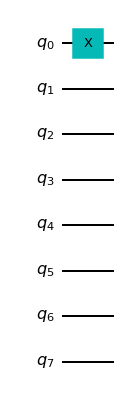

In [36]:
qc_encoded = QuantumCircuit(n)
qc_encoded.x(0)
qc_encoded.draw()

Zunächst erzeugen wir einen neuen Quantum-Circuit. Auch diesmal mit jeweils 8 Qubits, nur dass wir diesmal auf den Qubit 0 die "x" Operation anwenden und somit die übliche 0 auf eine 1 flippen.

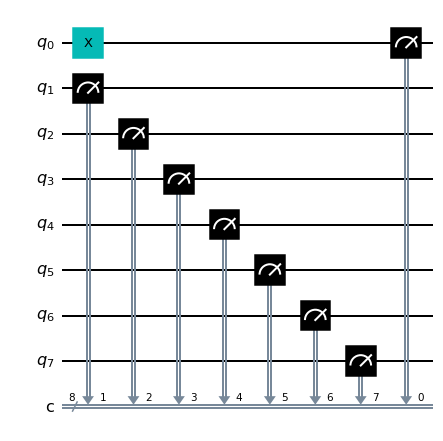

In [37]:
qc = qc_encoded + qc
qc.draw()

Im nächsten Schritt verknüpfen wir dann unsere beiden Quantum-Circuits. Jetzt müssen wir jedoch aufpassen, denn die Reihenfolge der Verknüpfung spielt hier eine Rolle. Im obigen Code fügen wir unserem neu erstellten Quantum-Circuit den bereits vorhandenen hinzu. Bedeutet die Operationen erfolgen entsprechend der Reihenfolge der gekoppelten Circuits. In diesem Fall bedeutet das, dass alle Operationen vom Circuit "qc_encoded" zuerst ausgeführt werden und dann vom "qc". In der Visualisierung können wir sehen, dass die "x" Operation auf Qubit q0 jetzt vor der Messung des Qubits vorgenommen wird.

Result(backend_name='qasm_simulator', backend_version='0.7.6', qobj_id='5a17363e-2f1d-413a-adac-c00c14da15ce', job_id='904a39a0-efee-4b82-9a89-1f0a406a2bee', success=True, results=[ExperimentResult(shots=2000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x1': 2000}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3], ['c', 4], ['c', 5], ['c', 6], ['c', 7]], creg_sizes=[['c', 8]], global_phase=0.0, memory_slots=8, n_qubits=8, name='circuit102', qreg_sizes=[['q', 8]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7]]), status=DONE, seed_simulator=1653182541, time_taken=0.010957726000000001, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-03-16T17:52:37.947571, status=COMPLETED, metadata={'max_memory_mb': 32162, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.

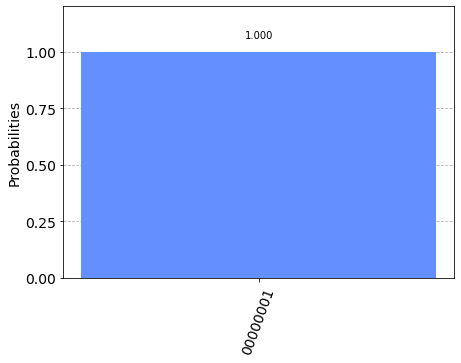

In [38]:
quantum_simulator = Aer.get_backend('qasm_simulator')
assembled_object = assemble(qc, shots=2000)
result = quantum_simulator.run(assembled_object).result()
print(str(result) + '\n')
#Dictionary vorbereiten
counts = result.get_counts()
print(counts)
#Visualisierung der ergebnisse
plot_histogram(counts)

Das Ergebnis unseres Simulators zeigt nun den Zustand '00000001' und zeigt uns entsprechend, dass das "flippen" vom Bit geklappt hat!

### Addition mit Qiskit
Das Anzeigen von verschiedenen Zuständen ist jedoch in der Praxis eher unspektakulär und bietet uns soweit keinen echten Nutzen. Im nächsten Schritt jedoch möchten wir das Verhalten eines klassischen Computers imitieren und somit ermöglichen, binäre Zahlen miteinander zu addieren. Um binäre Zahlen zu addieren, benötigen wir in der Digitaltechnik einen Halbaddierer (eng.: Half Adder). Das logische Gatter, welches das benötigte Verhalten liefert, ist das XOR Gatter (QIS1). Unser Ziel ist es also, ein XOR Gatter nachzubauen und dieses aufzurufen, um somit binäre Zahlen miteinander zu verrechnen.

Qiskit bildet das XOR Gate standardmäßig bereits ab mithilfe der Operation "cx", was für "CNOT" steht (QIS1). Der "cx" Operator erwartet zwei Parameter, also den Index zweier Qubits. Der erste Parameter des "cx" Operators bezeichnet man als "control qubit", während der zweite Parameter als "target qubit" bezeichnet wird (QIS1). Während das "control qubit" nach erfolgreicher Anwendung des "cx" Operators seinen Zustand behält, wird der "target qubit" mit dem Ergebnis der Operation überschrieben.

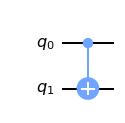

In [39]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

Im nächsten Schritt testen wir das CNOT-Gate mithilfe eines neuen Circuits und Eingabewerten.

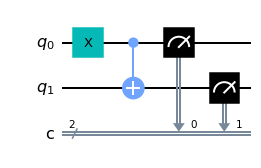

In [40]:
x = 2
qc_cnot_test = QuantumCircuit(x,x)

qc_cnot_test.x(0)
qc_cnot_test.cx(0,1)
for i in range(x):
    qc_cnot_test.measure(i,i)
qc_cnot_test.draw()

Result(backend_name='qasm_simulator', backend_version='0.7.6', qobj_id='571ea805-7b0c-4350-9b50-380c9c8aaa2b', job_id='a3a8db59-b069-4e4d-9517-11ba89dd16ab', success=True, results=[ExperimentResult(shots=2000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x3': 2000}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit104', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=370086244, time_taken=0.004293299, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-03-16T18:20:29.072843, status=COMPLETED, metadata={'max_memory_mb': 32162, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0044180800000000004}, time_taken=0.004698991775512695)

{'11': 2000}


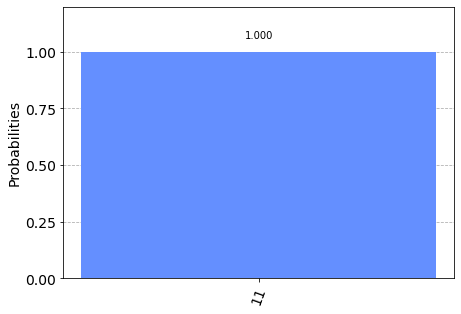

In [41]:
quantum_simulator = Aer.get_backend('qasm_simulator')
assembled_object = assemble(qc_cnot_test, shots=2000)
result = quantum_simulator.run(assembled_object).result()
print(str(result) + '\n')
#Dictionary vorbereiten
counts = result.get_counts()
print(counts)
#Visualisierung der ergebnisse
plot_histogram(counts)

Wir erhalten das Ergebnis '11'. Dadurch, dass wir q0 geflippt haben auf den Zustand 1 schreibt der CNOT-Operator auf q1 das Resultat 1. Der Zustand von q0 bleibt unberührt und somit erhalten wir das richtige Ergebnis.

Bevor wir als Nächstes aber einen kompletten Halbaddierer umsetzen, behandeln wir eine nicht ganz unwichtige Helferfunktion und zwar die Funktion "barrier()". Hierfür definieren wir uns zunächst einen neuen Circuit mit einem Qubit.

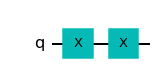

In [52]:
quantum_system_armonk = provider.get_backend('ibmq_armonk')
qc_barrier_intro = QuantumCircuit(1)
qc_barrier_intro.x(0)
qc_barrier_intro.x(0)
qc_barrier_intro.draw()

Auf unserem einzigen Qubit wenden wir nun direkt zweimal den "x" Operator an. Bedeutet, wir flippen den Status zweimal. Der aufmerksame Leser wird nun anmerken, dass das doch unnötig sei, weil der Zustand von q0 nach der zweiten Anwendung der Operation wieder 0 sein wird, was richtig ist. Um solche "Fehler" zu vermeiden, gibt es die Möglichkeit, die Funktion "transpile" zu nutzen. Diese Funktion entfernt unnötige Operatoren, die angewendet werden, um so einen Circuit zu optimieren.

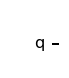

In [54]:
tc = transpile(qc_barrier_intro, quantum_system_armonk)
tc.draw()

Jetzt kann es auch der Fall sein, dass wir zwar nicht auf diese Aufräumfunktion verzichten wollen, aber dennoch ein bestimmtes Gatter-Paar erhalten bleiben soll. Hierfür nutzen wir die "barrier" Funktion, die diesen Sinn erfüllt und uns zusätzlich eine visuelle Abhilfe schafft Bereiche voneinander zu trennen.

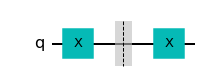

In [55]:
quantum_system_armonk = provider.get_backend('ibmq_armonk')
qc_barrier_intro = QuantumCircuit(1)
qc_barrier_intro.x(0)
qc_barrier_intro.barrier()
qc_barrier_intro.x(0)
qc_barrier_intro.draw()

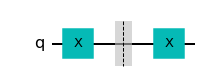

In [56]:
tc = transpile(qc_barrier_intro, quantum_system_armonk)
tc.draw()

Für den Halbaddierer nutzen wir die "barrier" Funktion als visuelles Hilfsmittel. Wir erzeugen also wieder einen neuen Circuit.

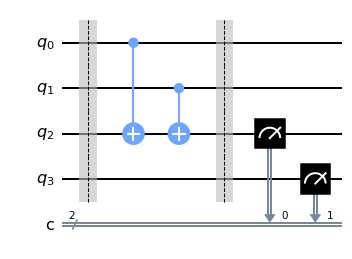

In [60]:
qc_halfadder = QuantumCircuit(4,2)
qc_halfadder.barrier()

qc_halfadder.cx(0,2)
qc_halfadder.cx(1,2)

qc_halfadder.barrier()

qc_halfadder.measure(2,0)
qc_halfadder.measure(3,1)

qc_halfadder.draw()

Mithilfe dieses Circuits schreiben wir die Resultate des CNOT-Gates in q2, um unsere Inputs q0 und q1 nicht zu überschreiben (QIS1). Das Einzige, was nun zum vollständigen Halbaddierer fehlt, ist, dass ebenfalls q3 der richtige Wert zugewiesen wird. Bei der Addition von zwei Bits haben wir insgesamt vier unterschiedliche Rechnungen:

$$
0+0=0
$$
$$
1+0=1
$$
$$
0+1=1
$$
$$
1+1=10
$$ 

Wir benötigen q3 also nur, wenn jeweils q0 und q1 jeweils 1 sind. In der Digitaltechnik wäre das also der Fall für ein AND-Gatter. In Qiskit ist das Äquivalent dazu das "Toffoli"-Gatter (QIS1). Dieses hilft uns auf q3 den x-Operator anzuwenden, wenn q0 und q1 beide 1 sind. In Qiskit nutzen wir dafür den "ccx"-Operator.

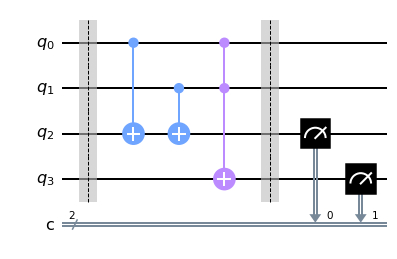

In [59]:
qc_halfadder = QuantumCircuit(4,2)
qc_halfadder.barrier()

qc_halfadder.cx(0,2)
qc_halfadder.cx(1,2)
qc_halfadder.ccx(0,1,3)
qc_halfadder.barrier()

qc_halfadder.measure(2,0)
qc_halfadder.measure(3,1)

qc_halfadder.draw()

Als Nächstes testen wir den Halbaddierer mit einigen Aufgaben.

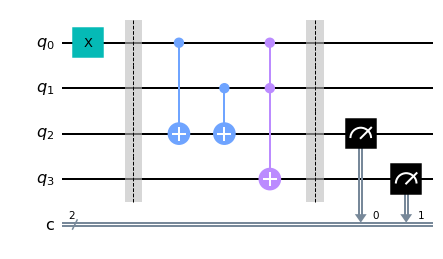

In [66]:
#Berechnung 1+0

qc_halfadder = QuantumCircuit(4,2)
qc_halfadder.x(0)
qc_halfadder.barrier()

qc_halfadder.cx(0,2)
qc_halfadder.cx(1,2)
qc_halfadder.ccx(0,1,3)
qc_halfadder.barrier()

qc_halfadder.measure(2,0)
qc_halfadder.measure(3,1)

qc_halfadder.draw(output='mpl')

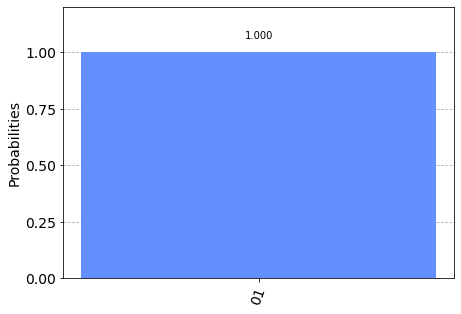

In [67]:
quantum_simulator = Aer.get_backend('qasm_simulator')
assembled_object = assemble(qc_halfadder, shots=2000)
counts = quantum_simulator.run(assembled_object).result().get_counts()
plot_histogram(counts)

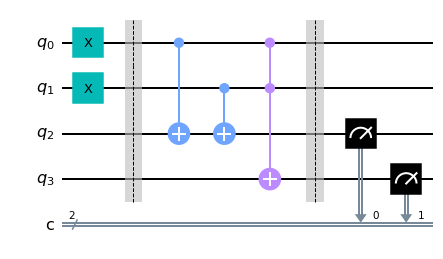

In [68]:
#Berechnung 1+1

qc_halfadder = QuantumCircuit(4,2)
qc_halfadder.x(0)
qc_halfadder.x(1)
qc_halfadder.barrier()

qc_halfadder.cx(0,2)
qc_halfadder.cx(1,2)
qc_halfadder.ccx(0,1,3)
qc_halfadder.barrier()

qc_halfadder.measure(2,0)
qc_halfadder.measure(3,1)

qc_halfadder.draw(output='mpl')

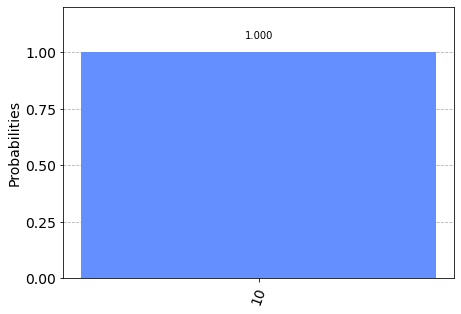

In [69]:
quantum_simulator = Aer.get_backend('qasm_simulator')
assembled_object = assemble(qc_halfadder, shots=2000)
counts = quantum_simulator.run(assembled_object).result().get_counts()
plot_histogram(counts)

## Gates